In [412]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS
from linearmodels.panel import PooledOLS


In [256]:
l_scaling = ['regression']
nl_scaling = ['distance_correlation']
scaling_methods = l_scaling + nl_scaling

l_dim = ['pca']
nl_dim = ['rbf']
dim_methods = l_dim + nl_dim

l_reg = ['ols']
nl_reg = ['svr']
reg_methods = l_reg + nl_reg

horizons = [1,6,12]

targets =  ['inflation', 'unemployment']
forecasts = pd.DataFrame(columns=['forecast', 'actual', 'target', 'horizon', 'scaling', 'dim_red', 'regression', 'month'])

for scaling in scaling_methods:
    for dim_red in dim_methods:
        for regression in reg_methods:
            for horizon in horizons:
                for target in targets:
                    forecast = np.load('resources/results/forecasts_good/{}_{}_{}_{}_h{}.npy'.format(target, dim_red, scaling, regression, horizon))
                    actual = np.load('resources/results/forecasts_good/{}_actual_h{}.npy'.format(target, horizon))
                    ar_forecast = np.load('resources/results/forecasts_good/{}_AR_h{}.npy'.format(target, horizon))
                    
                    r2_denom = np.mean((actual - np.mean(actual))**2)
                    for t in range(len(forecast)):
                        forecasts = forecasts.append({'forecast': forecast[t][0],'actual': actual[t][0], 'target': target, 'horizon': horizon, 'scaling': scaling,
                                                      'dim_red': dim_red, 'regression': regression, 'var_target':r2_denom, 'month':t, 'ar':ar_forecast[t][0]}, ignore_index=True)  

In [283]:
forecasts = forecasts_og

In [284]:
forecasts['errors'] = (forecasts['forecast'] - forecasts['actual'])**2
forecasts['r2'] = 1 - forecasts['errors']/forecasts['var_target']
forecasts['r2oos'] = 1 - forecasts['errors']/np.mean((forecasts['ar'] - forecasts['actual'])**2)
forecasts.head(10)

,forecast,actual,target,horizon,scaling,dim_red,regression,month,ar,var_target,nonlin_scaling,nonlin_dimred,nonlin_reg,interaction,hv,model_combs,errors,r2,r2oos
0,0.001825,0.005711,inflation,1,regression,pca,ols,0,0.002343,0.000009,0,0,0,0_0_0,1_inflation,regression_pca_ols,0.000015,-0.774445,0.998763
1,0.003137,0.002275,inflation,1,regression,pca,ols,1,0.003890,0.000009,0,0,0,0_0_0,1_inflation,regression_pca_ols,0.000001,0.912697,0.999939
2,0.002707,0.000568,inflation,1,regression,pca,ols,2,0.003417,0.000009,0,0,0,0_0_0,1_inflation,regression_pca_ols,0.000005,0.462378,0.999625
3,0.001383,0.001702,inflation,1,regression,pca,ols,3,0.002359,0.000009,0,0,0,0_0_0,1_inflation,regression_pca_ols,0.0,0.988026,0.999992
4,0.002055,0.005089,inflation,1,regression,pca,ols,4,0.001897,0.000009,0,0,0,0_0_0,1_inflation,regression_pca_ols,0.000009,-0.081321,0.999246
5,0.003717,0.002254,inflation,1,regression,pca,ols,5,0.003321,0.000009,0,0,0,0_0_0,1_inflation,regression_pca_ols,0.000002,0.748311,0.999825
6,0.002225,-0.00169,inflation,1,regression,pca,ols,6,0.003147,0.000009,0,0,0,0_0_0,1_inflation,regression_pca_ols,0.000015,-0.800995,0.998745
7,0.000833,0.0,inflation,1,regression,pca,ols,7,0.001341,0.000009,0,0,0,0_0_0,1_inflation,regression_pca_ols,0.000001,0.918413,0.999943
8,0.001135,0.003938,inflation,1,regression,pca,ols,8,0.000661,0.000009,0,0,0,0_0_0,1_inflation,regression_pca_ols,0.000008,0.076571,0.999356
9,0.000183,-0.002811,inflation,1,regression,pca,ols,9,0.002105,0.000009,0,0,0,0_0_0,1_inflation,regression_pca_ols,0.000009,-0.053578,0.999266


In [265]:
# Compute MSE per horizon, target, scaling, dim_red, regression
def mse(g):
    mse = np.mean((g['forecast'] - g['actual'])**2)
    return pd.Series(dict(mse = mse))


forecasts.groupby(['target', 'horizon', 'scaling', 'dim_red', 'regression']).apply(mse)*100

mse
target       horizon scaling              dim_red regression          
inflation    1       distance_correlation pca     ols         0.000681
                                                  svr         0.000872
                                          rbf     ols         0.000699
                                                  svr         0.000879
                     regression           pca     ols         0.000658
                                                  svr         0.000946
                                          rbf     ols         0.000658
                                                  svr         0.000805
             6       distance_correlation pca     ols         0.001204
                                                  svr         0.000940
                                          rbf     ols         0.001173
                                                  svr         0.000921
                     regression           pca     ols         0.001202
                                                  svr         0.000980
                                          rbf     ols         0.001202
                                                  svr         0.000869
             12      distance_correlation pca     ols         0.001234
                                                  svr         0.001002
                                          rbf     ols         0.001180
                                                  svr         0.001001
                     regression           pca     ols         0.001208
                                                  svr         0.001200
                                          rbf     ols         0.001208
                                                  svr         0.001030
unemployment 1       distance_correlation pca     ols         1.917785
                                                  svr         2.191501
                                          rbf     ols         1.866632
                                                  svr         2.236856
                     regression           pca     ols         1.955675
                                                  svr         2.236268
                                          rbf     ols         1.957390
                                                  svr         2.287692
             6       distance_correlation pca     ols         2.489413
                                                  svr         2.456861
                                          rbf     ols         2.477843
                                                  svr         2.474348
                     regression           pca     ols         2.454280
                                                  svr         2.468202
                                          rbf     ols         2.454280
                                                  svr         2.444953
             12      distance_correlation pca     ols         2.590979
                                                  svr         2.492648
                                          rbf     ols         2.581716
                                                  svr         2.546879
                     regression           pca     ols         2.625972
                                                  svr         2.519880
                                          rbf     ols         2.625846
                                                  svr         2.546959

In [285]:
# Create dummies for nonlinear scaling, dimred, reg
forecasts['nonlin_scaling'] = forecasts['scaling'].apply(lambda x: 1 if x in nl_scaling else 0)
forecasts['nonlin_dimred'] = forecasts['dim_red'].apply(lambda x: 1 if x in nl_dim else 0)
forecasts['nonlin_reg'] = forecasts['regression'].apply(lambda x: 1 if x in nl_reg else 0)

# Create variable to use as index, representing each of 8 groups
interactions = forecasts['nonlin_scaling'].astype(str) + "_" + forecasts['nonlin_dimred'].astype(str) + "_" + forecasts['nonlin_reg'].astype(str)
forecasts['interaction'] = interactions

hv_combs = forecasts['horizon'].astype(str) + "_" + forecasts['target'].astype(str)
forecasts['hv'] = hv_combs

model_comb = forecasts['scaling'].astype(str) + "_" + forecasts['dim_red'].astype(str) + "_" + forecasts['regression'].astype(str)

# Make categorical
forecasts['horizon'] = pd.Categorical(forecasts['horizon'])
forecasts['interaction'] = pd.Categorical(forecasts['interaction'])
forecasts['target'] = pd.Categorical(forecasts['target'])
forecasts['model_combs'] = pd.Categorical(model_comb)

# Set index
#forecasts = forecasts.set_index(['model_combs', 'month'])
#forecasts.head(5)

In [272]:
# Regress the R2 on the dummies
h_v = list(itertools.product(horizons, targets))

for h, v in h_v:
    print(f"horizon{h}, target{v}")
    data = forecasts[(forecasts['horizon']) == h & (forecasts['target'] == v)]
    data = forecasts.copy()
    data = convert_categorical_to_dummies(data)
    print(data.columns)
    mod = PanelOLS(data.r2, exog=data[['nonlin_reg', 'nonlin_scaling', 'nonlin_dimred']],
                   entity_effects=False, time_effects=True)
    #res = mod.fit()
    #mod = sm.OLS(data['r2'], data[['nonlin_reg', 'nonlin_scaling', 'nonlin_dimred']].astype(float))
    res = mod.fit()
    
    print(res)

horizon1, targetinflation
Index(['forecast', 'actual', 'scaling', 'dim_red', 'regression', 'ar',
       'var_target', 'errors', 'r2', 'r2oos', 'nonlin_scaling',
       'nonlin_dimred', 'nonlin_reg', 'hv', 'target_inflation',
       'target_unemployment', 'horizon_1', 'horizon_6', 'horizon_12',
       'interaction_0_0_0', 'interaction_0_0_1', 'interaction_0_1_0',
       'interaction_0_1_1', 'interaction_1_0_0', 'interaction_1_0_1',
       'interaction_1_1_0', 'interaction_1_1_1',
       'model_combs_distance_correlation_pca_ols',
       'model_combs_distance_correlation_pca_svr',
       'model_combs_distance_correlation_rbf_ols',
       'model_combs_distance_correlation_rbf_svr',
       'model_combs_regression_pca_ols', 'model_combs_regression_pca_svr',
       'model_combs_regression_rbf_ols', 'model_combs_regression_rbf_svr'],
      dtype='object')
                          PooledOLS Estimation Summary                          
Dep. Variable:                     r2   R-squared:        

Index(['forecast', 'actual', 'scaling', 'dim_red', 'regression', 'ar',
       'var_target', 'errors', 'r2', 'r2oos', 'nonlin_scaling',
       'nonlin_dimred', 'nonlin_reg', 'hv', 'target_inflation',
       'target_unemployment', 'horizon_1', 'horizon_6', 'horizon_12',
       'interaction_0_0_0', 'interaction_0_0_1', 'interaction_0_1_0',
       'interaction_0_1_1', 'interaction_1_0_0', 'interaction_1_0_1',
       'interaction_1_1_0', 'interaction_1_1_1',
       'model_combs_distance_correlation_pca_ols',
       'model_combs_distance_correlation_pca_svr',
       'model_combs_distance_correlation_rbf_ols',
       'model_combs_distance_correlation_rbf_svr',
       'model_combs_regression_pca_ols', 'model_combs_regression_pca_svr',
       'model_combs_regression_rbf_ols', 'model_combs_regression_rbf_svr'],
      dtype='object')
                          PooledOLS Estimation Summary                          
Dep. Variable:                     r2   R-squared:                     4.651e-05
Est

In [273]:
pip install arch

Note: you may need to restart the kernel to use updated packages.


In [400]:
from arch.bootstrap import SPA, MCS

In [409]:
for horizon in horizons:
    for target in targets:
        df = forecasts[(forecasts['horizon'] == horizon) & (forecasts['target'] == target)]

        benchmark = df['ar'][(df['scaling'] == 'regression') & (df['dim_red'] == "pca") & (df['regression'] == "ols")]
        actual = df['actual'][(df['scaling'] == 'regression') & (df['dim_red'] == "pca") & (df['regression'] == "ols")]
        df = df[['forecast', 'model_combs' ]]
        df['index'] = df.groupby('model_combs').cumcount()
        df = df.pivot(index='index', values='forecast', columns='model_combs')
        df = df.reset_index(drop=True)
        models = list(df.columns) + ['AR']
        
        bm_losses = benchmark - actual # Correct shape
        model_losses = df - actual.values.reshape(-1, 1) # Correct shape
        
        bm_losses = np.array(bm_losses.values**2, dtype=np.float64)
        model_losses = np.array(model_losses.values**2, dtype=np.float64)
        
        #bm_losses = np.zeros((227,1))
        #model_losses = np.zeros((227, 5))
                
        spa = SPA(bm_losses, model_losses, seed=42)
        spa.compute()
        print(f"Horizon {horizon} and target {target}")
        print(spa.pvalues)
        
        model_losses = np.append(model_losses, bm_losses.reshape(-1, 1), axis=1)
        mcs = MCS(losses=model_losses, size=0.2)
        mcs.compute()
        
        print("MCS P-values")
        print(mcs.pvalues)
        
        print("MCS Included")
        included = mcs.included
        print([models[model] for model in included])    
        
        print("MCS Excluded")
        excluded = mcs.excluded
        print([models[model] for model in excluded])    

        print("______________________________________")
        

Horizon 1 and target inflation
lower         0.012
consistent    0.031
upper         0.031
dtype: float64
MCS P-values
             Pvalue
Model index        
8             0.101
0             0.203
2             0.249
3             0.279
7             0.279
1             0.279
5             0.279
4             0.721
6             1.000
MCS Included
['distance_correlation_pca_ols', 'distance_correlation_pca_svr', 'distance_correlation_rbf_ols', 'distance_correlation_rbf_svr', 'regression_pca_ols', 'regression_pca_svr', 'regression_rbf_ols', 'regression_rbf_svr']
MCS Excluded
['AR']
______________________________________
Horizon 1 and target unemployment
lower         0.029
consistent    0.029
upper         0.029
dtype: float64
MCS P-values
             Pvalue
Model index        
8             0.118
6             0.297
0             0.297
4             0.297
3             0.297
7             0.297
5             0.413
1             0.413
2             1.000
MCS Included
['distance_correl

In [414]:
# Cumulative sum of difference in squared errors
def plot_cssed(benchmark, model):
    diff = np.cumsum(benchmark - model)
    
    plt.plot(diff)
    plt.xlabel('Period')
    plt.ylabel('Cumulative sum of difference in errors^2')
    plt.show()

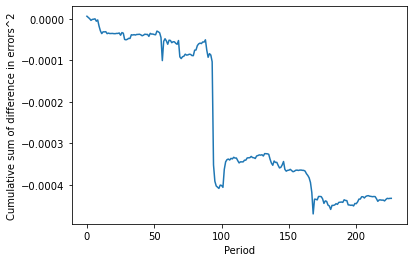

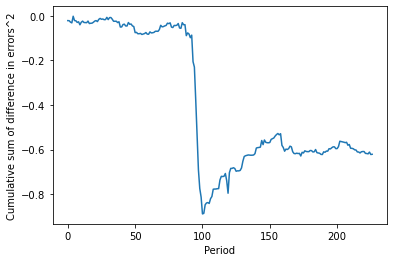

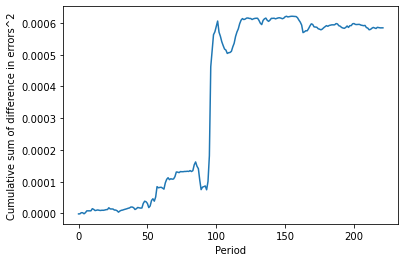

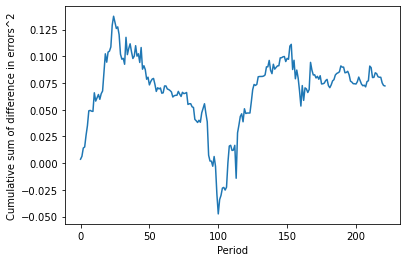

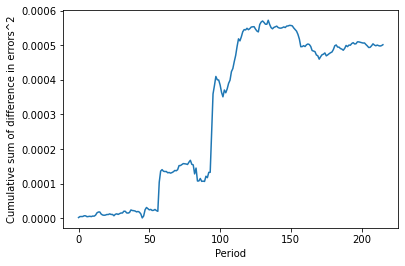

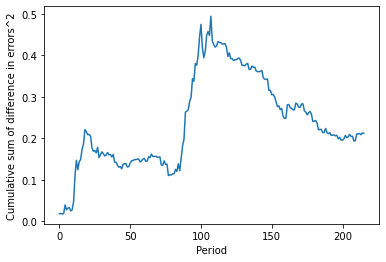

In [415]:
for horizon in horizons:
    for target in targets:
        df = forecasts[(forecasts['horizon'] == horizon) & (forecasts['target'] == target)]

        benchmark = df['ar'][(df['scaling'] == 'regression') & (df['dim_red'] == "pca") & (df['regression'] == "ols")]
        actual = df['actual'][(df['scaling'] == 'regression') & (df['dim_red'] == "pca") & (df['regression'] == "ols")]
        df = df[['forecast', 'model_combs' ]]
        df['index'] = df.groupby('model_combs').cumcount()
        df = df.pivot(index='index', values='forecast', columns='model_combs')
        df = df.reset_index(drop=True)
        models = list(df.columns) + ['AR']
        
        bm_losses = benchmark - actual # Correct shape
        model_losses = df - actual.values.reshape(-1, 1) # Correct shape
        
        bm_losses = np.array(bm_losses.values**2, dtype=np.float64)
        model_losses = np.array(model_losses.values**2, dtype=np.float64)
        
        plot_cssed(benchmark=model_losses[:,0], model=model_losses[:,1])
